# Loan Payback Prediction Project

### The objective of this project is to build a machine learning model to predict whether a borrower will pay back their loan based on financial and personal attributes. This is a binary classification problem.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warningsS
warnings.filterwarnings('ignore')

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier

In [3]:
# Load datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}")

Train shape: (593994, 13)
Test shape: (254569, 12)


In [4]:
# Dataset information
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593994 entries, 0 to 593993
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    593994 non-null  int64  
 1   annual_income         593994 non-null  float64
 2   debt_to_income_ratio  593994 non-null  float64
 3   credit_score          593994 non-null  int64  
 4   loan_amount           593994 non-null  float64
 5   interest_rate         593994 non-null  float64
 6   gender                593994 non-null  object 
 7   marital_status        593994 non-null  object 
 8   education_level       593994 non-null  object 
 9   employment_status     593994 non-null  object 
 10  loan_purpose          593994 non-null  object 
 11  grade_subgrade        593994 non-null  object 
 12  loan_paid_back        593994 non-null  float64
dtypes: float64(5), int64(2), object(6)
memory usage: 58.9+ MB


In [5]:
# First 10 rows
train.head(10)

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
0,0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0
3,3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0
4,4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0
5,5,44940.30,0.058,653,12159.92,12.24,Male,Single,Bachelor's,Employed,Other,D1,1.0
6,6,61574.16,0.042,696,16907.71,13.52,Other,Single,High School,Self-employed,Debt consolidation,C5,1.0
7,7,45953.31,0.100,654,10111.62,12.82,Female,Married,High School,Employed,Home,D1,1.0
8,8,30592.29,0.132,713,7522.36,9.48,Male,Married,Bachelor's,Employed,Education,C5,1.0
9,9,17342.45,0.121,548,9653.48,16.04,Female,Married,Bachelor's,Self-employed,Vacation,F1,1.0


In [6]:
# Statistical summary
train.describe()

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,loan_paid_back
count,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000
mean,296996.500000,48212.202976,0.120696,680.916009,15020.297629,12.356345,0.798820
std,171471.442236,26711.942078,0.068573,55.424956,6926.530568,2.008959,0.400883
min,0.000000,6002.430000,0.011000,395.000000,500.090000,3.200000,0.000000
25%,148498.250000,27934.400000,0.072000,646.000000,10279.620000,10.990000,1.000000
50%,296996.500000,46557.680000,0.096000,682.000000,15000.220000,12.370000,1.000000
75%,445494.750000,60981.320000,0.156000,719.000000,18858.580000,13.680000,1.000000
max,593993.000000,393381.740000,0.627000,849.000000,48959.950000,20.990000,1.000000


In [7]:
# Missing values check
missing = train.isnull().sum().to_frame(name='Missing Count')
missing['Percentage'] = (missing['Missing Count'] / len(train)) * 100
print(missing[missing['Missing Count'] > 0])

Empty DataFrame
Columns: [Missing Count, Percentage]
Index: []


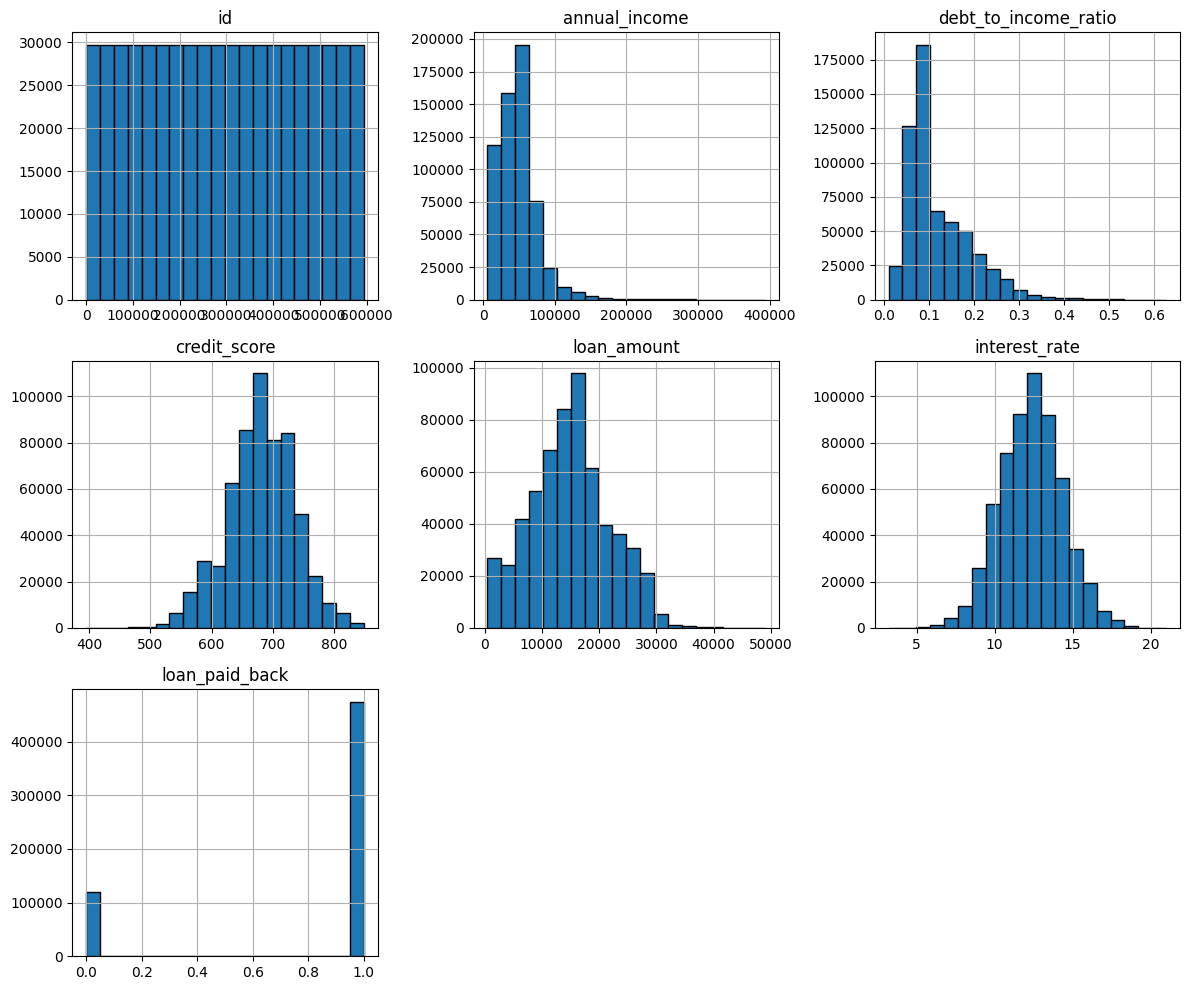

In [41]:
# Distribution of numerical features
train.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.tight_layout()
plt.savefig('img/Distribution of numerical features.png', dpi=300, bbox_inches='tight')
plt.show()

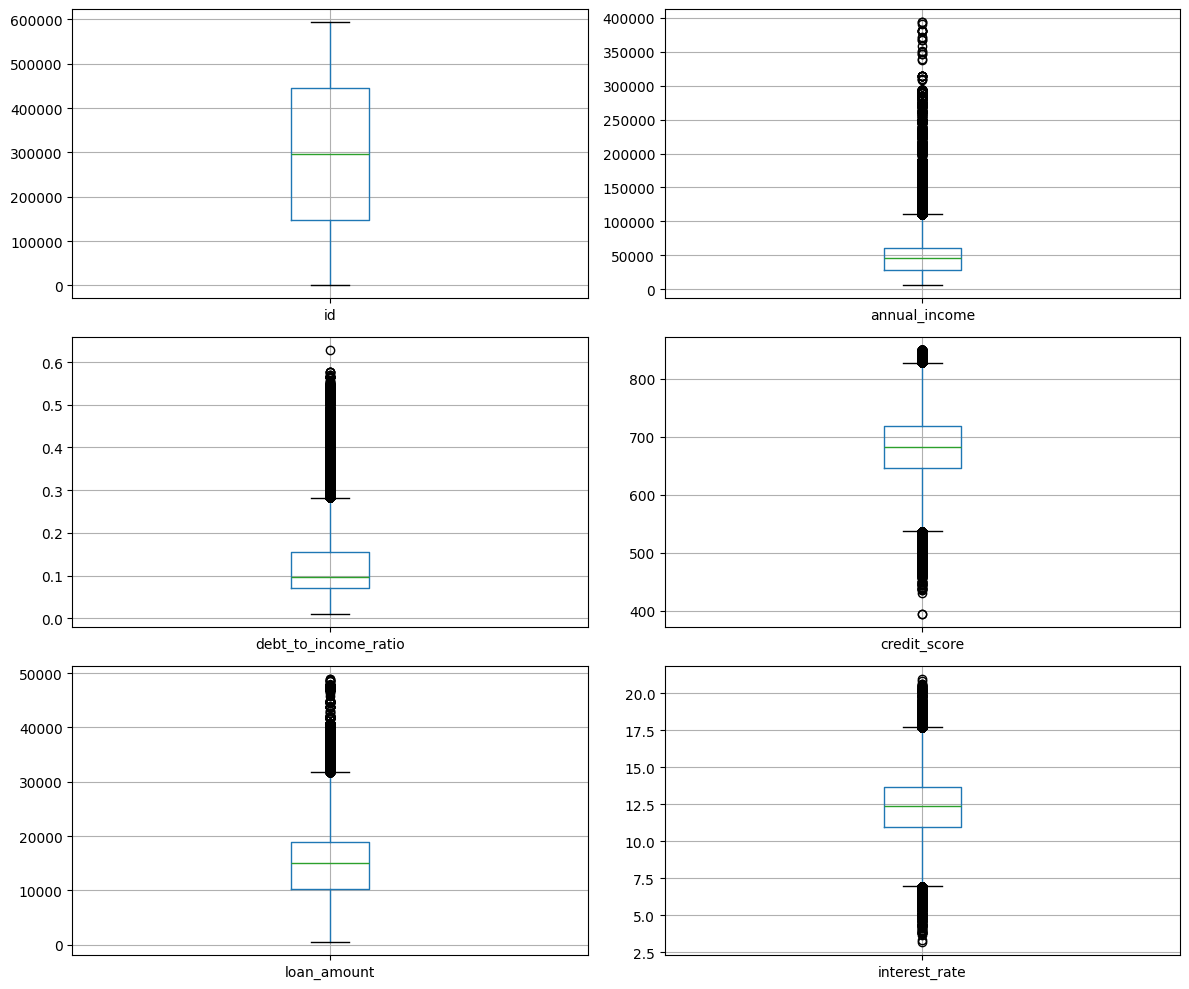

In [42]:
# Outlier detection using boxplots
numeric_cols = train.select_dtypes(include='number').columns

fig, axes = plt.subplots(3, 2, figsize=(12, 10))
for i, col in enumerate(numeric_cols[:6]):
    train.boxplot(column=col, ax=axes[i//2, i%2])
    
plt.tight_layout()
plt.savefig('img/# Outlier detection using boxplots.png', dpi=300, bbox_inches='tight')
plt.show()

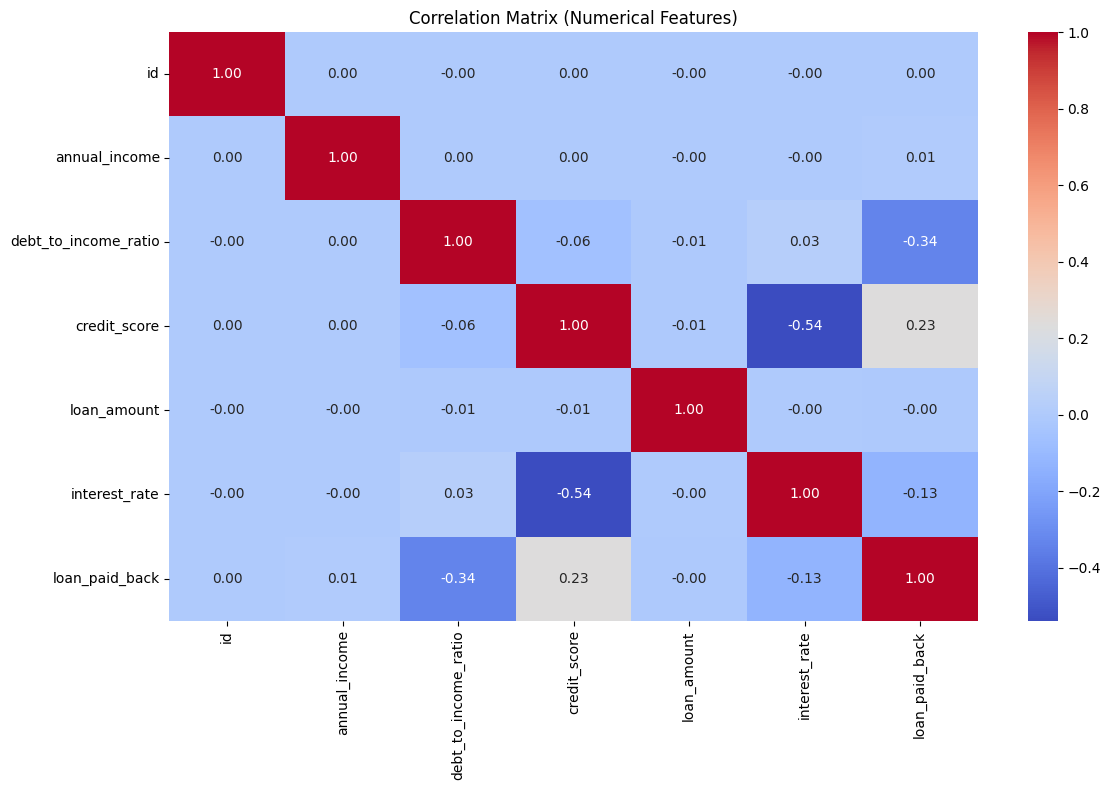

In [43]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
numeric_df = train.select_dtypes(include='number')  
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix (Numerical Features)')
plt.tight_layout()
plt.savefig('img/Correlation heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

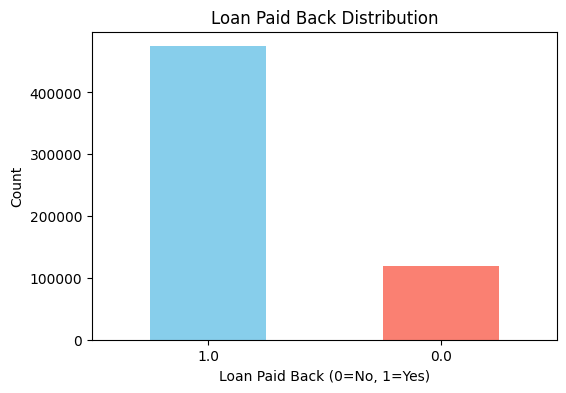

loan_paid_back
1.0    474494
0.0    119500
Name: count, dtype: int64


In [49]:
# Target variable distribution
plt.figure(figsize=(6, 4))
train['loan_paid_back'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Loan Paid Back Distribution')
plt.xlabel('Loan Paid Back (0=No, 1=Yes)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.savefig('img/Target variable distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print(train['loan_paid_back'].value_counts())

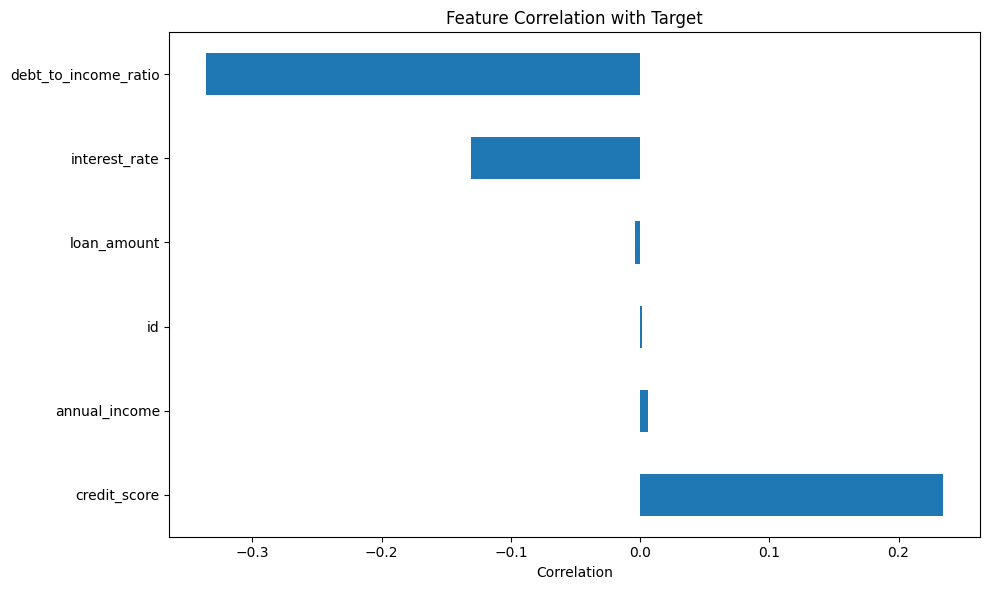

credit_score            0.234560
annual_income           0.006326
id                      0.001387
loan_amount            -0.003762
interest_rate          -0.131184
debt_to_income_ratio   -0.335680
Name: loan_paid_back, dtype: float64


In [48]:
# Feature correlation with target 
numeric_df = train.select_dtypes(include='number')  
target_corr = numeric_df.corr()['loan_paid_back'].drop('loan_paid_back')
target_corr = target_corr.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
target_corr.plot(kind='barh')
plt.title('Feature Correlation with Target')
plt.xlabel('Correlation')
plt.tight_layout()
plt.savefig('img/Feature correlation with target.png', dpi=300, bbox_inches='tight')
plt.show()

print(target_corr) 

In [13]:
# Data Preprocessing
X = train.drop(['id', 'loan_paid_back'], axis=1)
y = train['loan_paid_back']

In [14]:
# Outlier clipping using IQR method
outlier_cols = ['annual_income', 'debt_to_income_ratio', 'loan_amount']

for col in outlier_cols:
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    X[col] = X[col].clip(lower, upper)

print("Outlier clipping complete")

Outlier clipping complete


In [15]:
# Label encoding for categorical features
categorical_cols = ['gender', 'marital_status', 'education_level', 
                   'employment_status', 'loan_purpose', 'grade_subgrade']

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

print("Label encoding complete")

Label encoding complete


In [16]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Feature scaling complete")

Feature scaling complete


In [17]:
# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

print(f"Training set: {X_train.shape}")
print(f"Validation set: {X_val.shape}")

Training set: (475195, 11)
Validation set: (118799, 11)


In [28]:
# Logistic Regression
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",42
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`multi

In [29]:
lr_pred = lr_model.predict(X_val)
lr_acc = accuracy_score(y_val, lr_pred)

print(f"Logistic Regression Accuracy: {lr_acc:.4f}")

Logistic Regression Accuracy: 0.9017


In [30]:
# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

,"priors priors: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None
,"var_smoothing var_smoothing: float, default=1e-9Portion of the largest variance of all features that is added tovariances for calculation stability... versionadded:: 0.20",1e-09


In [31]:
nb_pred = nb_model.predict(X_val)
nb_acc = accuracy_score(y_val, nb_pred)

print(f"Naive Bayes Accuracy: {nb_acc:.4f}")

Naive Bayes Accuracy: 0.8833


In [37]:
# Random Forest
rf_model = RandomForestClassifier(
    n_estimators=200, 
    max_depth=20, 
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",20
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y

In [38]:
rf_pred = rf_model.predict(X_val)
rf_acc = accuracy_score(y_val, rf_pred)

print(f"Random Forest Accuracy: {rf_acc:.4f}")

Random Forest Accuracy: 0.9114


In [39]:
# XGBoost
xgb_model = XGBClassifier(
    n_estimators=200,
    max_depth=8,
    learning_rate=0.1,
    random_state=42,
    n_jobs=-1
)
xgb_model.fit(X_train, y_train)


,"objective objective: str | xgboost.sklearn._SklObjWProto | typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]] | NoneSpecify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: float | typing.List[float] | NoneThe initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.List[xgboost.callback.TrainingCallback] | NoneList of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: float | NoneSubsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: float | NoneSubsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: float | NoneSubsample ratio of columns when constructing each tree.,None
,"device device: str | None.. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: int | None.. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: str | typing.List[str | typing.Callable] | typing.Callable | None.. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes from sklearn.metrics import mean_absolute_error X, y = load_diabetes(return_X_y=True) reg = xgb.XGBRegressor( tree_meth

In [40]:
xgb_pred = xgb_model.predict(X_val)
xgb_acc = accuracy_score(y_val, xgb_pred)

print(f"XGBoost Accuracy: {xgb_acc:.4f}")

XGBoost Accuracy: 0.9131


In [41]:
# MLP Neural Network
mlp_model = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    max_iter=500,
    random_state=42,
    early_stopping=True
)
mlp_model.fit(X_train, y_train)

,"hidden_layer_sizes hidden_layer_sizes: array-like of shape(n_layers - 2,), default=(100,)The ith element represents the number of neurons in the ithhidden layer.","(64, ...)"
,"activation activation: {'identity', 'logistic', 'tanh', 'relu'}, default='relu'Activation function for the hidden layer.- 'identity', no-op activation, useful to implement linear bottleneck, returns f(x) = x- 'logistic', the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).- 'tanh', the hyperbolic tan function, returns f(x) = tanh(x).- 'relu', the rectified linear unit function, returns f(x) = max(0, x)",'relu'
,"solver solver: {'lbfgs', 'sgd', 'adam'}, default='adam'The solver for weight optimization.- 'lbfgs' is an optimizer in the family of quasi-Newton methods.- 'sgd' refers to stochastic gradient descent.- 'adam' refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy BaFor a comparison between Adam optimizer and SGD, see:ref:`sphx_glr_auto_examples_neural_networks_plot_mlp_training_curves.py`.Note: The default solver 'adam' works pretty well on relativelylarge datasets (with thousands of training samples or more) in terms ofboth training time and validation score.For small datasets, however, 'lbfgs' can converge faster and performbetter.",'adam'
,"alpha alpha: float, default=0.0001Strength of the L2 regularization term. The L2 regularization termis divided by the sample size when added to the loss.For an example usage and visualization of varying regularization, see:ref:`sphx_glr_auto_examples_neural_networks_plot_mlp_alpha.py`.",0.0001
,"batch_size batch_size: int, default='auto'Size of minibatches for stochastic optimizers.If the solver is 'lbfgs', the classifier will not use minibatch.When set to ""auto"", `batch_size=min(200, n_samples)`.",'auto'
,"learning_rate learning_rate: {'constant', 'invscaling', 'adaptive'}, default='constant'Learning rate schedule for weight updates.- 'constant' is a constant learning rate given by 'learning_rate_init'.- 'invscaling' gradually decreases the learning rate at each time step 't' using an inverse scaling exponent of 'power_t'. effective_learning_rate = learning_rate_init / pow(t, power_t)- 'adaptive' keeps the learning rate constant to 'learning_rate_init' as long as training loss keeps decreasing. Each time two consecutive epochs fail to decrease training loss by at least tol, or fail to increase validation score by at least tol if 'early_stopping' is on, the current learning rate is divided by 5.Only used when ``solver='sgd'``.",'constant'
,"learning_rate_init learning_rate_init: float, default=0.001The initial learning rate used. It controls the step-sizein updating the weights. Only used when solver='sgd' or 'adam'.",0.001
,"power_t power_t: float, default=0.5The exponent for inverse scaling learning rate.It is used in updating effective learning rate when the learning_rateis set to 'invscaling'. Only used when solver='sgd'.",0.5
,"max_iter max_iter: int, default=200Maximum number of iterations. The solver iterates until convergence(determined by 'tol') or this number of iterations. For stochasticsolvers ('sgd', 'adam'), note that this determines the number of epochs(how many times each data point will be used), not the number ofgradient steps.",500
,"shuffle shuffle: bool, default=TrueWhether to shuffle samples in each iteration. Only used whensolver='sgd' or 'adam'.",True
,"random_state random_state: int, RandomState instance, default=NoneDetermines random number generation for weights and biasinitialization, train-test split if early stopping is used, and batchsampling when solver='sgd' or 'adam'.Pass an int for reproducible results across multiple function calls.See :term:`Glossary `.",42


In [42]:
mlp_pred = mlp_model.predict(X_val)
mlp_acc = accuracy_score(y_val, mlp_pred)

print(f"MLP Accuracy: {mlp_acc:.4f}")

MLP Accuracy: 0.9104


In [43]:
# Model Performance Comparison
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 'Random Forest', 'XGBoost', 'MLP'],
    'Accuracy': [lr_acc, nb_acc, rf_acc, xgb_acc, mlp_acc]
})
results = results.sort_values('Accuracy', ascending=False)

print(results)
print(f"\nBest Model: {results.iloc[0]['Model']} with {results.iloc[0]['Accuracy']:.4f} accuracy")

                 Model  Accuracy
3              XGBoost  0.913090
2        Random Forest  0.911379
4                  MLP  0.910382
0  Logistic Regression  0.901739
1          Naive Bayes  0.883290

Best Model: XGBoost with 0.9131 accuracy


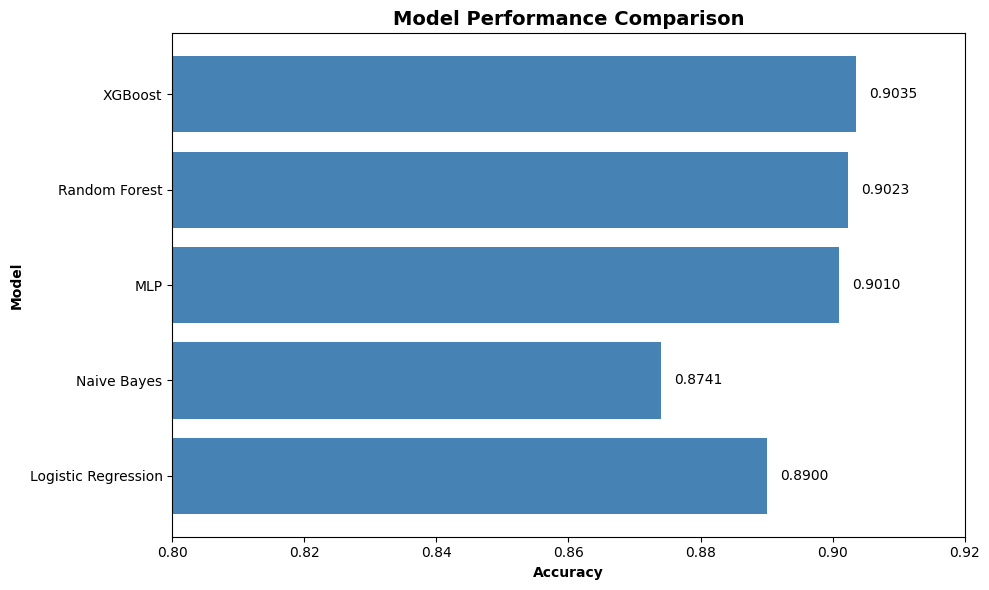

In [47]:
# Visualize model comparison
plt.figure(figsize=(10, 6))
plt.barh(results['Model'], results['Accuracy'], color='steelblue')
plt.xlabel('Accuracy', fontweight='bold')
plt.ylabel('Model', fontweight='bold')
plt.title('Model Performance Comparison', fontweight='bold', fontsize=14)
plt.xlim(0.80, 0.92)
for i, v in enumerate(results['Accuracy']):
    plt.text(v + 0.002, i, f'{v:.4f}', va='center')
plt.tight_layout()
plt.savefig('img/Visualize model comparison.png', dpi=300, bbox_inches='tight')
plt.show()

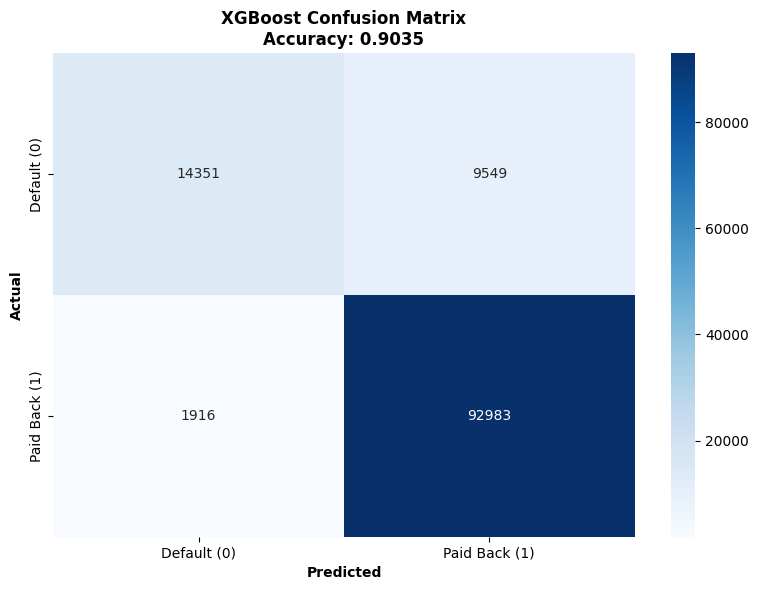

In [46]:
# Confusion Matrix (Best Model - XGBoost)
cm = confusion_matrix(y_val, xgb_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Default (0)', 'Paid Back (1)'], 
            yticklabels=['Default (0)', 'Paid Back (1)'])
plt.title(f'XGBoost Confusion Matrix\nAccuracy: {xgb_acc:.4f}', fontweight='bold')
plt.ylabel('Actual', fontweight='bold')
plt.xlabel('Predicted', fontweight='bold')
plt.tight_layout()
plt.savefig('img/Confusion Matrix.png', dpi=300, bbox_inches='tight')
plt.show()

In [26]:
# Detailed Classification Report
print("XGBoost Classification Report:")
print(classification_report(y_val, xgb_pred, target_names=['Default', 'Paid Back']))

XGBoost Classification Report:
              precision    recall  f1-score   support

     Default       0.88      0.60      0.71     23900
   Paid Back       0.91      0.98      0.94     94899

    accuracy                           0.90    118799
   macro avg       0.89      0.79      0.83    118799
weighted avg       0.90      0.90      0.90    118799



In [27]:
# Feature Importance Analysis
features = ['annual_income', 'debt_to_income_ratio', 'credit_score', 
            'loan_amount', 'interest_rate', 'gender', 'marital_status',
            'education_level', 'employment_status', 'loan_purpose', 'grade_subgrade']

importance = xgb_model.feature_importances_
imp_df = pd.DataFrame({
    'Feature': features,
    'Importance': importance
}).sort_values('Importance', ascending=False)

print(imp_df)

                 Feature  Importance
8      employment_status    0.897837
1   debt_to_income_ratio    0.038672
2           credit_score    0.024459
10        grade_subgrade    0.011070
3            loan_amount    0.004592
0          annual_income    0.004361
4          interest_rate    0.004146
9           loan_purpose    0.004027
7        education_level    0.003857
6         marital_status    0.003599
5                 gender    0.003379


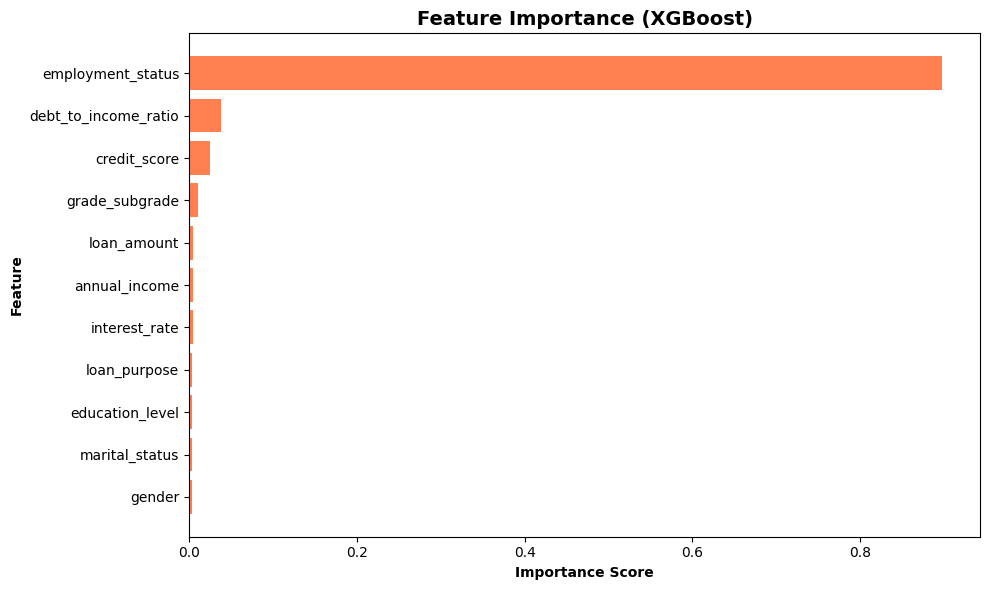

In [45]:
# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(imp_df['Feature'], imp_df['Importance'], color='coral')
plt.xlabel('Importance Score', fontweight='bold')
plt.ylabel('Feature', fontweight='bold')
plt.title('Feature Importance (XGBoost)', fontweight='bold', fontsize=14)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('img/Visualize feature importance.png', dpi=300, bbox_inches='tight')
plt.show()

In [29]:
# Process test data
test_processed = test.copy()
test_ids = test['id']

print(f"Test data shape: {test_processed.shape}")

Test data shape: (254569, 12)


In [30]:
# Outlier clipping for test data
for col in outlier_cols:
    Q1 = test_processed[col].quantile(0.25)
    Q3 = test_processed[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    test_processed[col] = test_processed[col].clip(lower, upper)

print("Test outlier clipping complete")

Test outlier clipping complete


In [31]:
# Label encoding for test data
for col in categorical_cols:
    le = LabelEncoder()
    test_processed[col] = le.fit_transform(test_processed[col])

print("Test label encoding complete")

Test label encoding complete


In [32]:
# Prepare test features
X_test = test_processed.drop(['id'], axis=1)
X_test_scaled = scaler.transform(X_test)

print(f"Test features prepared: {X_test_scaled.shape}")

Test features prepared: (254569, 11)


In [33]:
# Generate predictions using best model (XGBoost)
predictions = xgb_model.predict_proba(X_test_scaled)[:, 1]

print(f"Predictions generated: {len(predictions)}")
print(f"Mean probability: {predictions.mean():.4f}")
print(f"Min probability: {predictions.min():.4f}")
print(f"Max probability: {predictions.max():.4f}")

Predictions generated: 254569
Mean probability: 0.7999
Min probability: 0.0003
Max probability: 0.9999


In [34]:
# Create submission file
submission = pd.DataFrame({
    'id': test_ids,
    'loan_paid_back': predictions
})

submission.to_csv('submission.csv', index=False)

print(f"✓ Submission file created!")
print(f"  Total predictions: {len(submission):,}")
print(f"\nFirst 5 predictions:")
print(submission.head())

✓ Submission file created!
  Total predictions: 254,569

First 5 predictions:
       id  loan_paid_back
0  593994        0.955914
1  593995        0.984600
2  593996        0.436488
3  593997        0.886405
4  593998        0.965549


In [35]:
import joblib

# Save the Scaler and the Model
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(mlp_model, 'loan_model.pkl')

print("Files saved: 'scaler.pkl' and 'loan_model.pkl'")

Files saved: 'scaler.pkl' and 'loan_model.pkl'


In [44]:
# Get all metrics for document
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 'MLP', 'Random Forest', 'XGBoost'],
    'Accuracy': [lr_acc, nb_acc, mlp_acc, rf_acc, xgb_acc],
    'Precision': [
        precision_score(y_val, lr_pred, average='weighted'),
        precision_score(y_val, nb_pred, average='weighted'),
        precision_score(y_val, mlp_pred, average='weighted'),
        precision_score(y_val, rf_pred, average='weighted'),
        precision_score(y_val, xgb_pred, average='weighted')
    ],
    'Recall': [
        recall_score(y_val, lr_pred, average='weighted'),
        recall_score(y_val, nb_pred, average='weighted'),
        recall_score(y_val, mlp_pred, average='weighted'),
        recall_score(y_val, rf_pred, average='weighted'),
        recall_score(y_val, xgb_pred, average='weighted')
    ],
    'F1-Score': [
        f1_score(y_val, lr_pred, average='weighted'),
        f1_score(y_val, nb_pred, average='weighted'),
        f1_score(y_val, mlp_pred, average='weighted'),
        f1_score(y_val, rf_pred, average='weighted'),
        f1_score(y_val, xgb_pred, average='weighted')
    ],
    'ROC-AUC': [
        roc_auc_score(y_val, lr_model.predict_proba(X_val)[:, 1]),
        roc_auc_score(y_val, nb_model.predict_proba(X_val)[:, 1]),
        roc_auc_score(y_val, mlp_model.predict_proba(X_val)[:, 1]),
        roc_auc_score(y_val, rf_model.predict_proba(X_val)[:, 1]),
        roc_auc_score(y_val, xgb_model.predict_proba(X_val)[:, 1])
    ]
})

print(results.sort_values('Accuracy', ascending=False))

                 Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
4              XGBoost  0.913090   0.911966  0.913090  0.905797  0.918601
3        Random Forest  0.911379   0.911318  0.911379  0.903014  0.910487
2                  MLP  0.910382   0.909605  0.910382  0.902206  0.909285
0  Logistic Regression  0.901739   0.897037  0.901739  0.895125  0.888795
1          Naive Bayes  0.883290   0.880858  0.883290  0.881935  0.886865
